In [1]:
import sys, matplotlib, numpy as np, pandas as pd, tensorflow as tf, sklearn
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

from plotly import subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn import model_selection, preprocessing, metrics
import lightgbm as lgb

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

Link to the [dataset](https://archive.ics.uci.edu/ml/datasets/Online+Video+Characteristics+and+Transcoding+Time+Dataset#)

In [6]:
from zipfile import ZipFile
with ZipFile("online_video_dataset.zip", 'r') as zip:
    zip.extractall()

In [2]:
trans_mesure = pd.read_csv("transcoding_mesurment.tsv", sep='\t')
yt_vid = pd.read_csv("youtube_videos.tsv", sep='\t')

In [3]:
trans_mesure.name = "transcoding_mesurment"
yt_vid.name = "youtube_videos"

In [9]:
print(open("README.txt", "r").read())

The presented dataset is composed of two tsv files named "youtube_videos.tsv" 
and "transcoding_mesurment.tsv". The first contains 10 columns of fundamental 
video characteristics for 1.6 million youtube videos; It contains YouTube video id, 
duration, bitrate(total in Kbits), bitrate(video bitrate in Kbits), 
height(in pixle), width(in pixles), framrate, estimated framerate, codec, 
category, and direct video link. This dataset can be used to gain insight
in characteristics of consumer videos found on UGC(Youtube).

The second file of our dataset contains 20 columns(see column names for names) 
which include input and output video characteristics along with their transcoding 
time and memory resource requirements while transcoding videos to diffrent but 
valid formats. The second dataset was collected based on experiments on an Intel 
i7-3720QM CPU through randomly picking two rows from the first dataset and using 
these as input and output parameters of a video transcoding applicatio

### Attribute Information:

**id** = Youtube videp id  
**duration** = duration of video  
**bitrate** bitrate(video) = video bitrate  
**height** = height of video in pixles  
**width** = width of video in pixles  
**frame rate** = actual video frame rate  
**frame rate(est.)** = estimated video frame rate  
**codec** = coding standard used for the video  
**category** = YouTube video category  
**url** = direct link to video (has expiration date)  
i = number of i frames in the video  
p = number of p frames in the video  
b = number of b frames in the video  
**frames** = number of frames in video  
**i_size** = total size in byte of i videos  
**p_size** = total size in byte of p videos  
**b_size** = total size in byte of b videos  
**size** = total size of video  
**o_codec** = output codec used for transcoding  
**o_bitrate** = output bitrate used for transcoding  
**o_framerate** = output framerate used for transcoding  
**o_width** = output width in pixel used for transcoding  
**o_height** = output height used in pixel for transcoding  
**umem** = total codec allocated memory for transcoding  
**utime** = total transcoding time for transcoding  

In [81]:
print(trans_mesure.shape)
print(trans_mesure.columns.values)
trans_mesure

(68784, 22)
['id' 'duration' 'codec' 'width' 'height' 'bitrate' 'framerate' 'i' 'p'
 'b' 'frames' 'i_size' 'p_size' 'b_size' 'size' 'o_codec' 'o_bitrate'
 'o_framerate' 'o_width' 'o_height' 'umem' 'utime']


,id,duration,codec,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.356670,mpeg4,176,144,54590,12.000000,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.00,176,144,22508,0.612
1,04t6-jw9czg,130.356670,mpeg4,176,144,54590,12.000000,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.00,320,240,25164,0.980
2,04t6-jw9czg,130.356670,mpeg4,176,144,54590,12.000000,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.00,480,360,29228,1.216
3,04t6-jw9czg,130.356670,mpeg4,176,144,54590,12.000000,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.00,640,480,34316,1.692
4,04t6-jw9czg,130.356670,mpeg4,176,144,54590,12.000000,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.00,1280,720,58528,3.456
5,04t6-jw9czg,130.356670,mpeg4,176,144,54590,12.000000,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.00,1920,1080,102072,6.320
6,04t6-jw9czg,130.356670,mpeg4,176,144,54590,12.000000,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,15.00,176,144,23132,0.728
7,04t6-jw9czg,130.356670,mpeg4,176,144,54590,12.000000,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,15.00,320,240,25164,0.944
8,04t6-jw9czg,130.356670,mpeg4,176,144,54590,12.000000,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,15.00,480,360,29236,1.476
9,04t6-jw9czg,130.356670,mpeg4,176,144,54590,12.000000,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,15.00,640,480,34312,1.964


In [4]:
Y = trans_mesure.utime

In [12]:
yt_vid

,id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url
0,uDNj-_5ty48,267,373,274,568,320,29.97,0.00,h264,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
1,uDNj-_5ty48,267,512,396,480,270,29.97,29.97,h264,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
2,uDNj-_5ty48,267,324,263,400,226,29.97,29.97,flv1,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
3,uDNj-_5ty48,267,85,55,176,144,12.00,12.00,mpeg4,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
4,WCgt-AactyY,31,1261,1183,640,480,24.00,0.00,h264,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...
5,WCgt-AactyY,31,1166,1183,640,480,24.00,0.00,vp8,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...
6,WCgt-AactyY,31,736,646,480,360,24.00,0.00,h264,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...
7,WCgt-AactyY,31,715,641,480,360,24.00,24.00,h264,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...
8,WCgt-AactyY,31,762,641,480,360,24.00,24.00,vp8,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...
9,WCgt-AactyY,31,370,305,320,240,24.00,24.00,flv1,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...


In [13]:
print(yt_vid.columns.values)
yt_vid.shape

['id' 'duration' 'bitrate' 'bitrate(video)' 'height' 'width' 'frame rate'
 'frame rate(est.)' 'codec' 'category' 'url']


(168286, 11)

In [6]:
yt_vid.loc[yt_vid['codec'] == 'none', 'codec'] = np.NaN

In [7]:
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

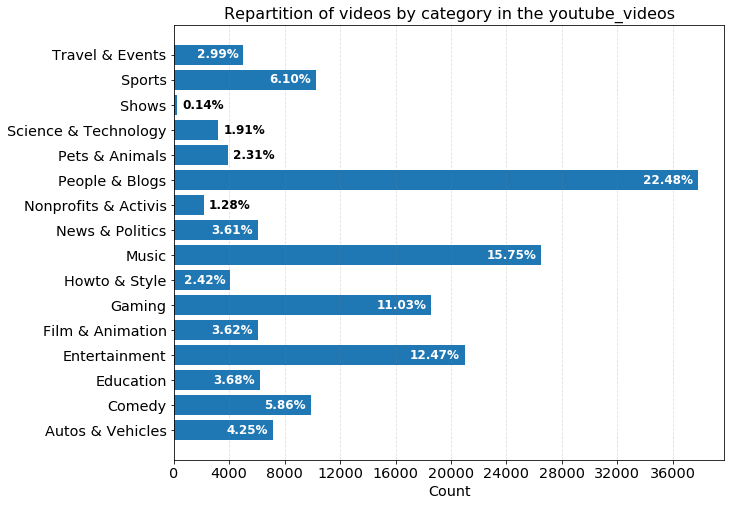

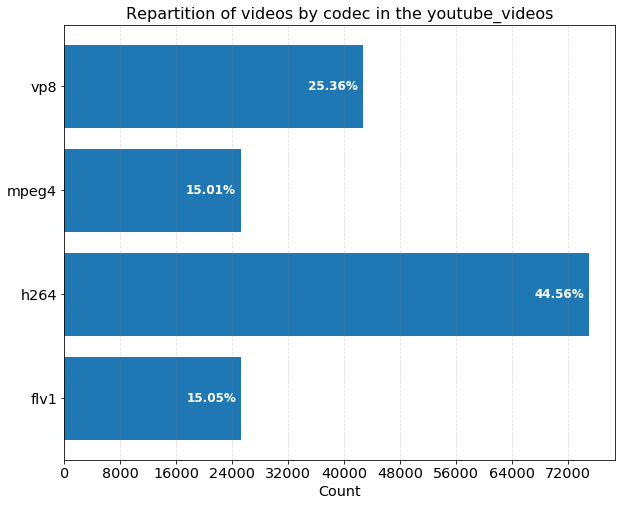

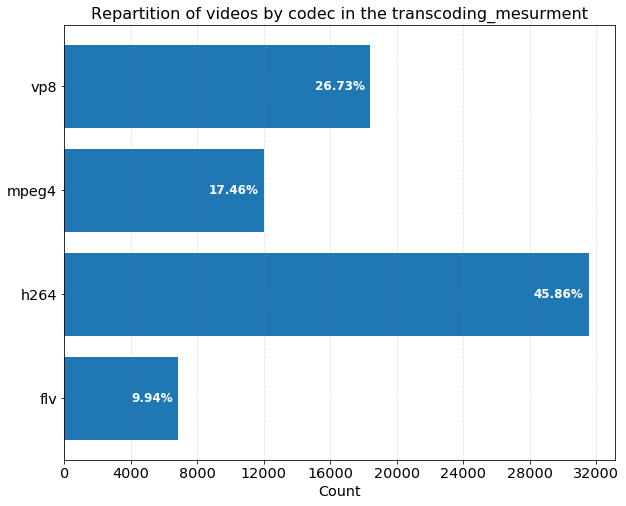

In [8]:
import re
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple


def attach_percentage(num):
    """helper function to convert percentage fractions to string

    0.224. -> 22.4%
    """
    return re.findall(pattern="\d*[.]\d{1,2}", string=str(100 * num))[0] + '%'

def bar_plot_qualitative(dataset, column):
    #  create the figure
    fig, ax1 = plt.subplots(figsize=(10, 8))
    fig.subplots_adjust(left=0.115, right=0.88)
    fig.canvas.set_window_title('project figure')
    
    categories = pd.unique(dataset[-dataset[column].isna()][column])
    count = dataset.groupby(column)[column].count()

    pos = np.arange(len(categories))
    
    rects = ax1.barh(pos, count,
                     align='center',
                     height=0.8,
                     tick_label=np.array(count.axes[0]))

    plt.xticks(fontsize = "x-large")
    plt.yticks(fontsize = "x-large")
    ax1.set_title("Repartition of videos by {1} in the {0}".format(dataset.name,column), fontdict = {'fontsize': 16})

    ax1.xaxis.set_major_locator(MaxNLocator(11))
    ax1.xaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.25)
    
    ax1.set_xlabel('Count', fontdict = {'fontsize':"x-large"})
    rect_labels = []
    
    for rect in rects:
        width = int(rect.get_width())
        
        rankStr = attach_percentage(width/count.sum())
        if width < 4000:
            xloc = 5
            clr = 'black'
            align = 'left'
        else:
            xloc = -5
            clr = 'white'
            align = 'right'
            
        yloc = rect.get_y() + rect.get_height() / 2
        label = ax1.annotate(rankStr, xy=(width, yloc), xytext=(xloc, 0),
                            textcoords="offset points",
                            ha=align, va='center',
                            color=clr, weight='bold', clip_on=True, fontsize = "large")
        rect_labels.append(label)
    
    plt.savefig('' + dataset.name + '_' + column + '.png')
    return {'fig': fig,
            'ax': ax1,
            'bars': rects,
            'perc_labels': rect_labels}

yt_category_plot = bar_plot_qualitative(yt_vid,'category')
yt_codec_plot = bar_plot_qualitative(yt_vid, 'codec')
transcoding_codec_plot = bar_plot_qualitative(trans_mesure,'codec')
plt.show()

I used [this](https://matplotlib.org/3.1.1/gallery/statistics/barchart_demo.html#sphx-glr-gallery-statistics-barchart-demo-py) to inspire myself on how to do this plot.

<BarContainer object of 4 artists>

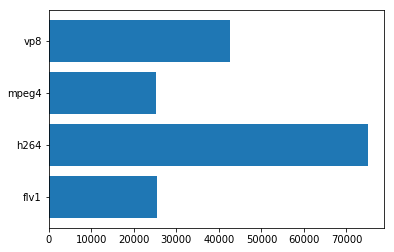

In [9]:
dataset = yt_vid
column = 'codec'
count = dataset.groupby(column)[column].count()
plt.barh(np.arange(len(count)), count, tick_label=np.array(count.axes[0]))

In [10]:
def horizontal_bar_chart(cnt_srs, color):
    trace = go.Bar(
        y=cnt_srs.index[::-1],
        x=cnt_srs.values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

cnt_srs = trans_mesure.groupby('codec')['utime'].agg(['mean'])
cnt_srs.columns = ['mean']
cnt_srs = cnt_srs.sort_values(by='mean', ascending = False)
trace1 = horizontal_bar_chart(cnt_srs["mean"].head(), 'rgba(50, 171, 96, 0.6)')

cnt_srs = trans_mesure.groupby('bitrate')['utime'].agg(['mean'])
cnt_srs.columns = ['mean']
cnt_srs = cnt_srs.sort_values(by='mean', ascending = False)
trace2 = horizontal_bar_chart(cnt_srs["mean"].head(), 'rgba(71, 58, 131, 0.8)')

cnt_srs = trans_mesure.groupby('height')['utime'].agg(['mean'])
cnt_srs.columns = ['mean']
cnt_srs = cnt_srs.sort_values(by='mean', ascending = False)
trace3 = horizontal_bar_chart(cnt_srs["mean"].head(), 'rgba(246, 78, 139, 0.6)')

cnt_srs = trans_mesure.groupby('width')['utime'].agg(['mean'])
cnt_srs.columns = ['mean']
cnt_srs = cnt_srs.sort_values(by='mean', ascending = False)
trace4 = horizontal_bar_chart(cnt_srs["mean"].head(), 'rgba(200, 70, 145, 0.6)')

fig = subplots.make_subplots(rows=2, cols=2, horizontal_spacing=0.10, 
                          subplot_titles=["Encodage", "Bitrate", "Hauteur", "Largeur"])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)

fig['layout'].update(height=900, width=900, paper_bgcolor='rgb(233,233,233)', title="Moyenne de temps d'encodage")
py.iplot(fig, filename='device-plots')

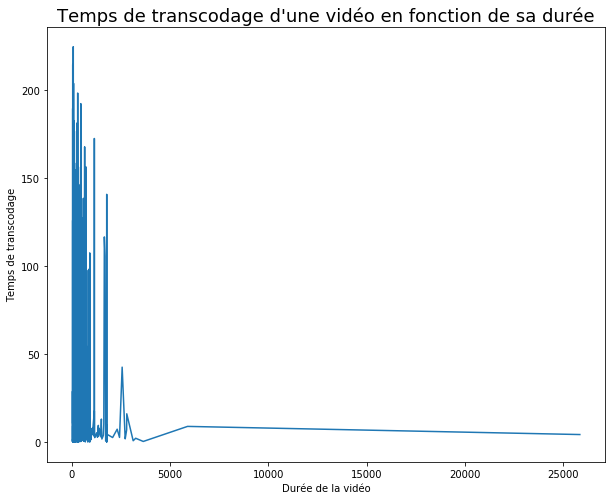

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
parameters = {'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'legend.fontsize': 'medium',
          'font.size': 15.0}
plt.rcParams.update(parameters)
ax.set_ylabel('Temps de transcodage')
ax.set_xlabel('Durée de la vidéo')
plt.title("Temps de transcodage d'une vidéo en fonction de sa durée")
ax.plot(trans_mesure.sort_values(by='duration', ascending = False)['duration'], trans_mesure.sort_values(by='duration', ascending = False)['utime'])

{'fig': <Figure size 720x576 with 1 Axes>,
 'ax': <matplotlib.axes._subplots.AxesSubplot at 0x278a2446b00>,
 'bars': <BarContainer object of 4 artists>,
 'perc_labels': [Text(-5,0,'9.94%'),
  Text(-5,0,'45.86%'),
  Text(-5,0,'17.46%'),
  Text(-5,0,'26.73%')]}

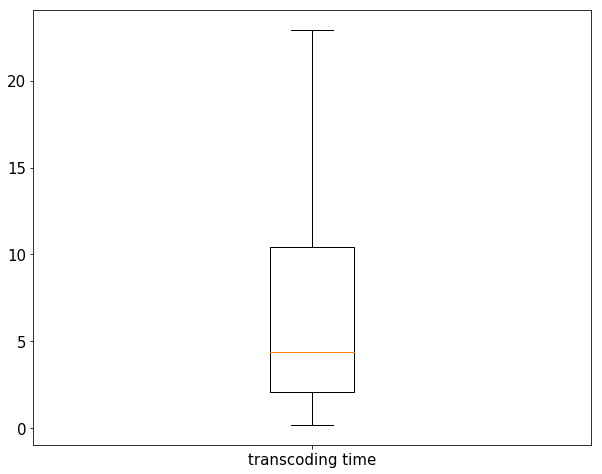

In [12]:
plt.subplots(figsize=(10, 8))
parameters = {'xtick.labelsize': 15,
          'ytick.labelsize': 15}
plt.rcParams.update(parameters)
transcoding_time_plot = plt.boxplot(trans_mesure.utime, labels=["transcoding time"], showfliers=False)
plt.savefig('transcoding_time_plot.png')
transcoding_codec_plot

In [7]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

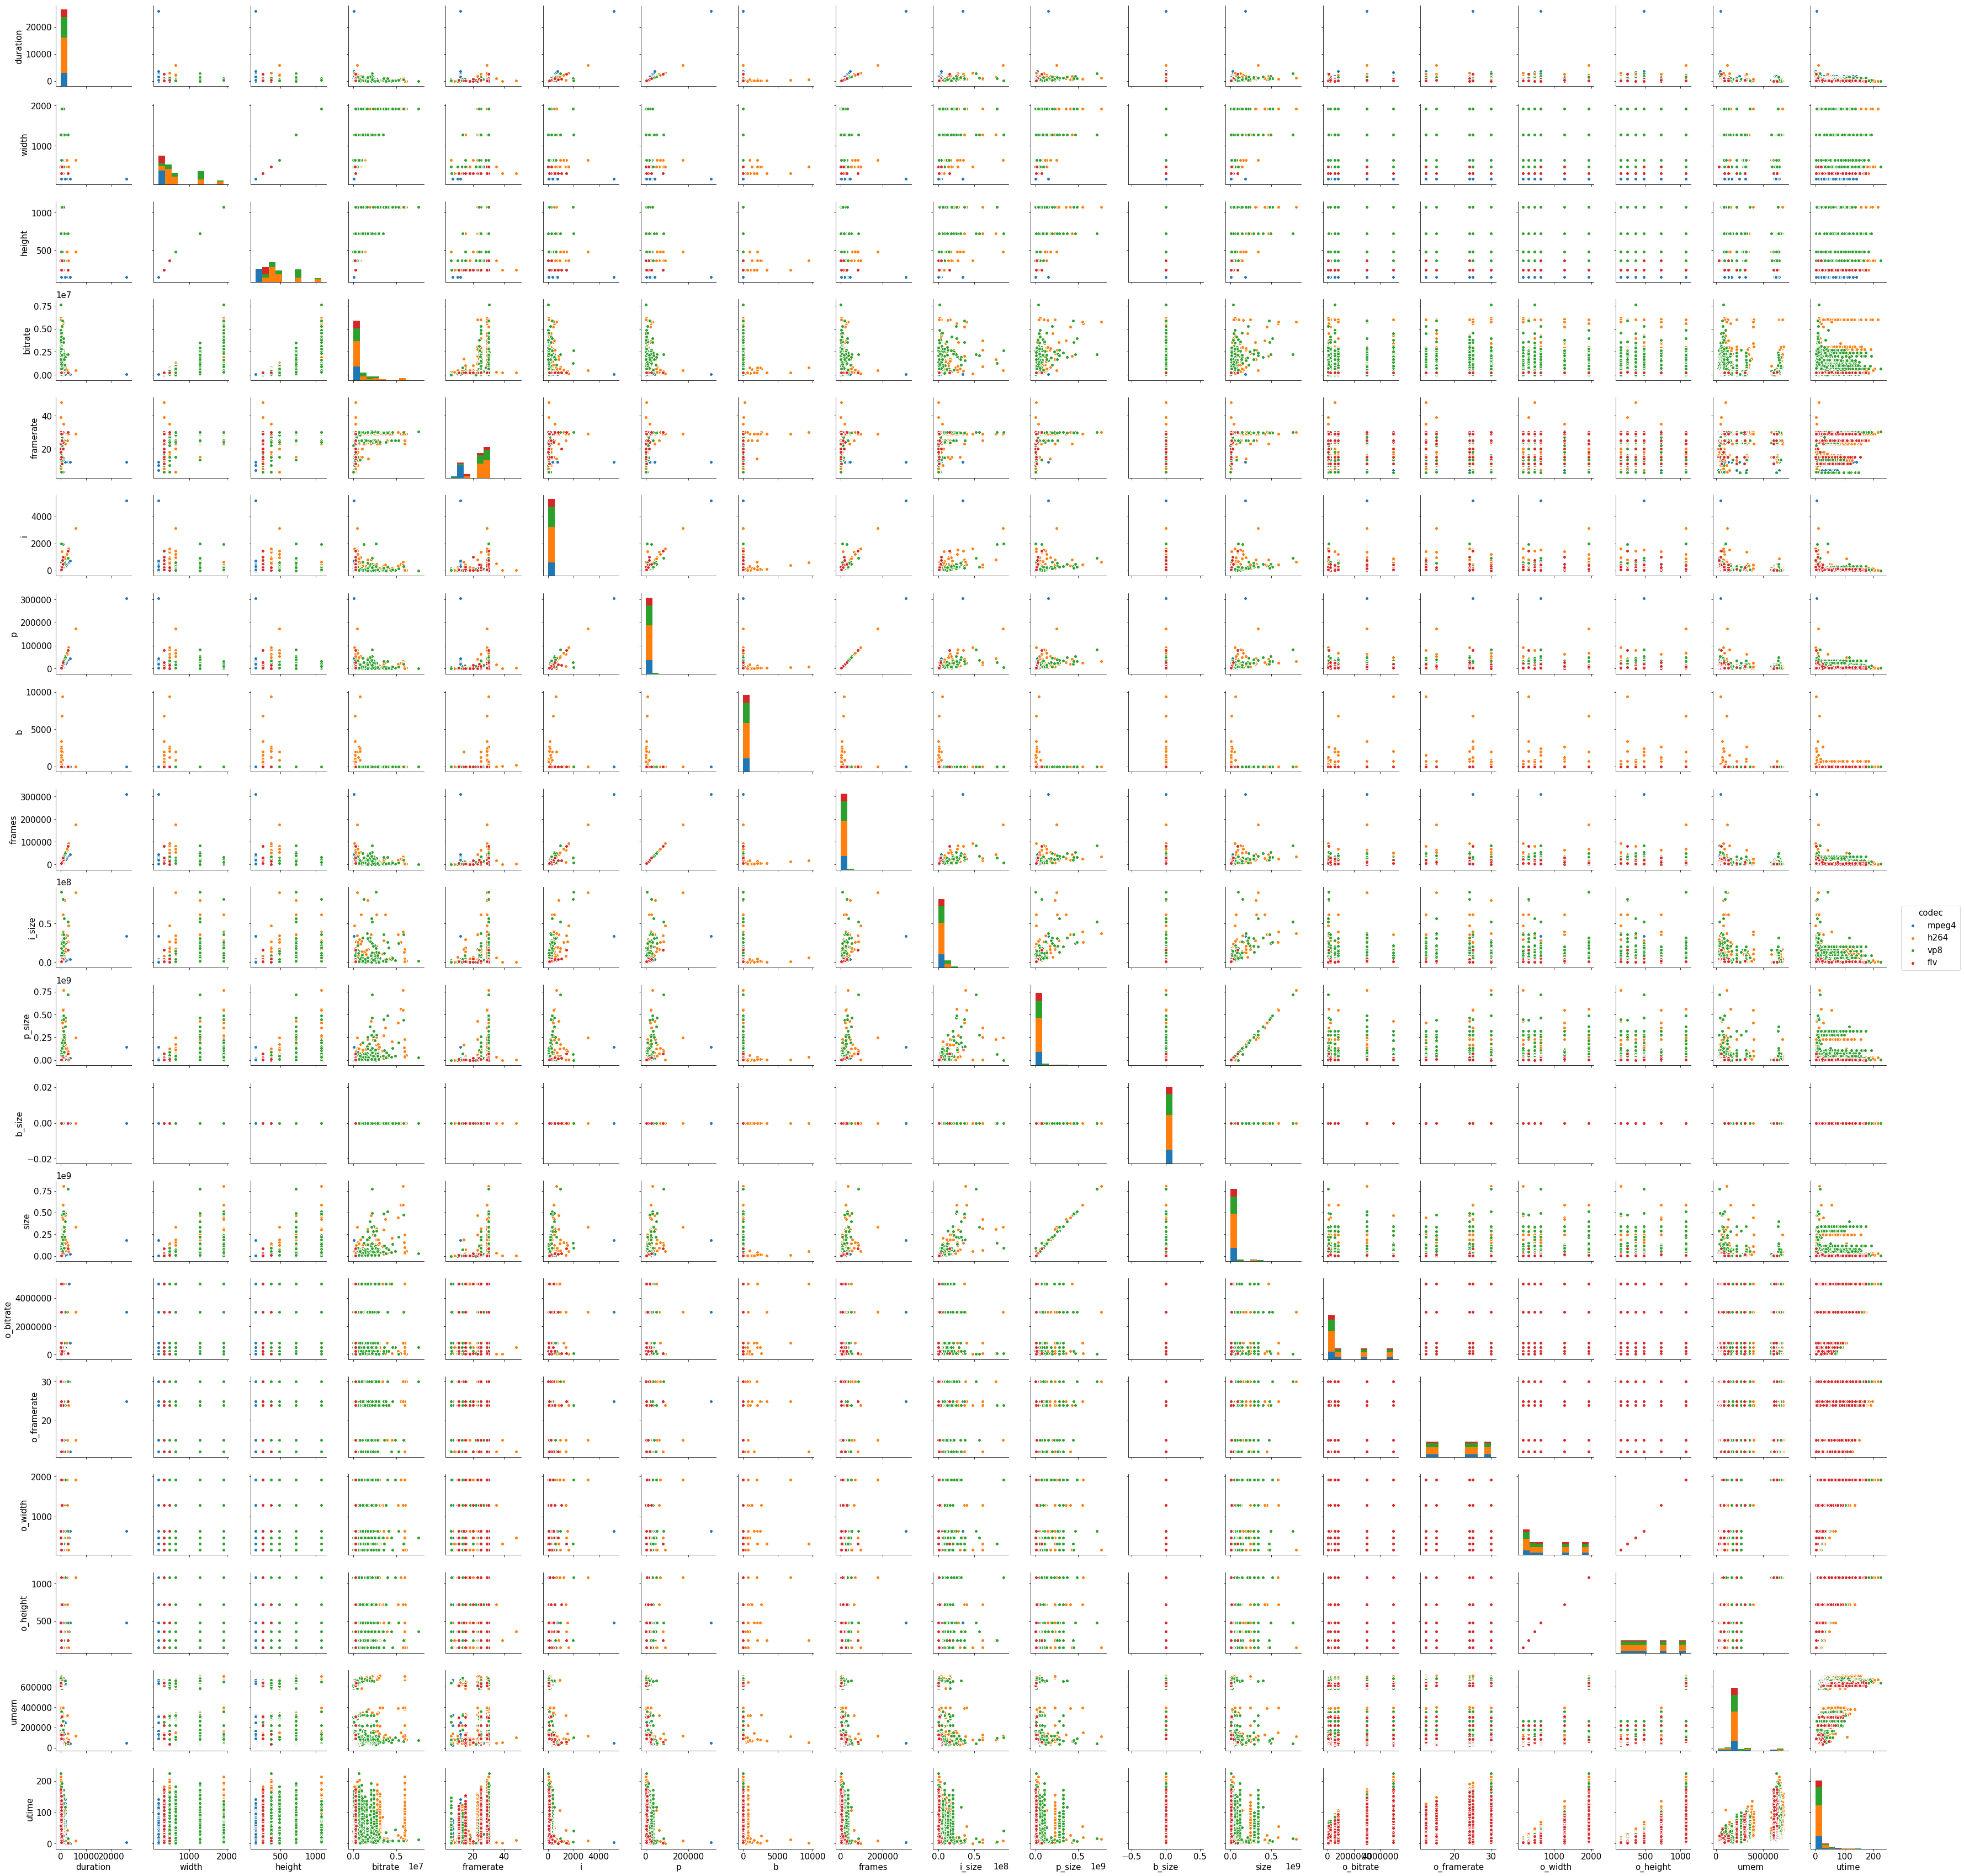

In [134]:
a = sns.pairplot(data=trans_mesure, hue = 'codec')

In [137]:
fig = a.fig
fig.savefig('variable_connection.png')

In [75]:
trans_mesure['dimension'] = trans_mesure['height'] * trans_mesure['width']

In [11]:
trans_mesure.b_size.describe()

count    68784.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: b_size, dtype: float64

In [53]:
del trans_mesure['b_size']

KeyError: 'b_size'

In [88]:
trans_mesure.drop(['id','codec','o_codec','utime'], axis=1).shape

(68784, 18)

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(trans_mesure.drop(['id','codec','o_codec','utime'], axis=1), trans_mesure.utime, train_size = 0.5, test_size = 0.3)

In [177]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_train_col = X_train.columns
x_test_col = X_test.columns
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [178]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [179]:
Y_pred = reg.predict(X_test)

In [180]:
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [ 2.65124771e-01  3.28908372e+00 -3.34999331e+00  1.85904267e+00
  6.99960473e-01  3.11504729e+11  2.28636142e+13  3.96171387e+11
 -2.31506670e+13 -1.08701794e+00 -4.93034103e+00  5.41392316e+00
  2.54076914e+00  1.70467943e+00  3.12548779e+00  1.99448327e+00
  8.72568708e+00  3.23188767e-01]


In [181]:
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred))

Mean squared error: 109.33
Coefficient of determination: 0.58


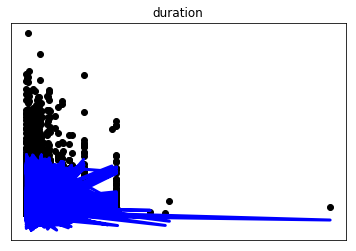

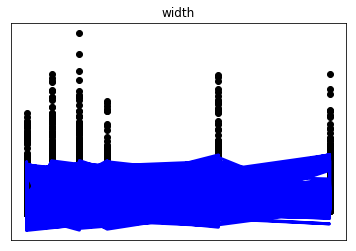

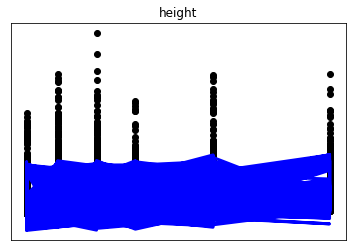

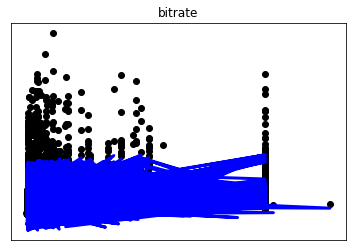

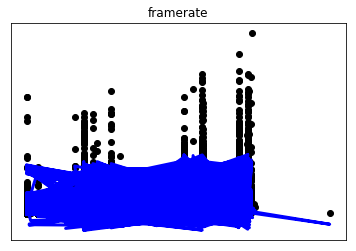

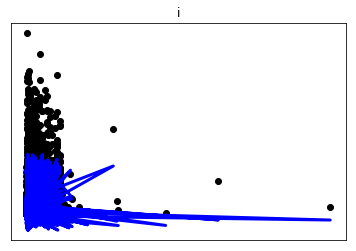

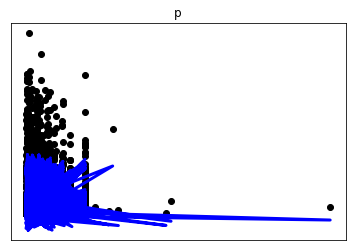

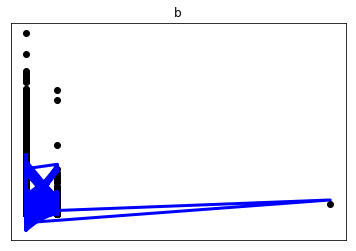

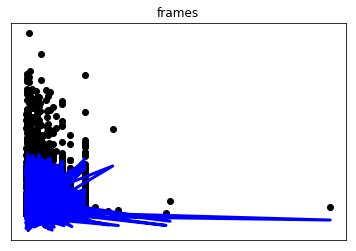

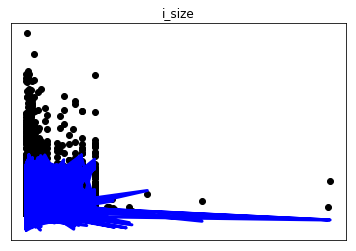

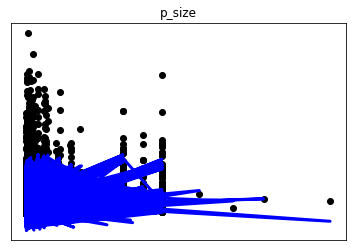

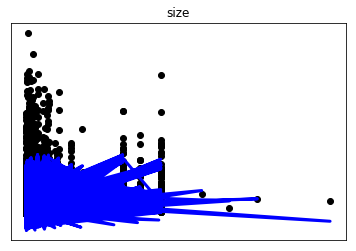

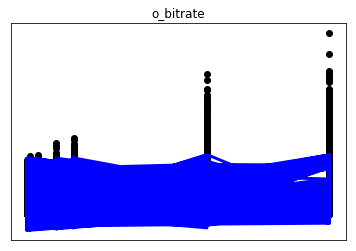

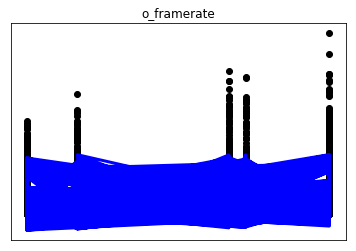

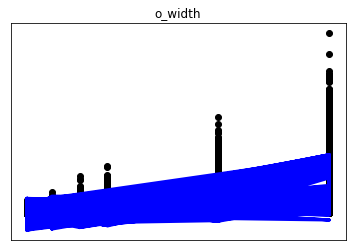

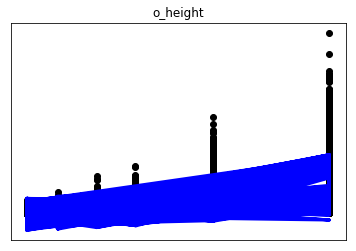

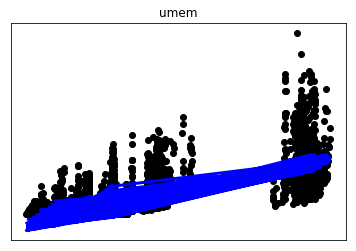

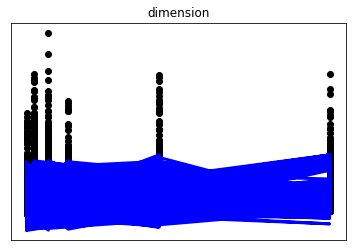

In [145]:
xtest = pd.DataFrame(X_test)
xtest.columns = x_test_col

for i in range(xtest.shape[1]):
    plt.scatter(xtest[i], Y_test,  color='black')
    plt.plot(xtest[i], Y_pred, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.title(trans_mesure.drop(['id','codec','o_codec','utime'], axis=1).columns[i])
    plt.savefig(trans_mesure.drop(['id','codec','o_codec','utime'], axis=1).columns[i] + '_vs_target_reglinear.png')
    plt.show()

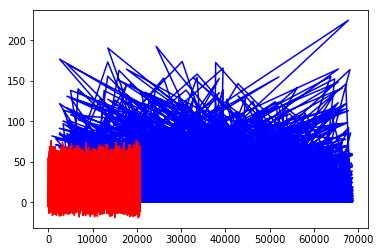

In [182]:
plt.plot(Y_test, color = 'b')
plt.plot(Y_pred, color = 'r')
plt.show()

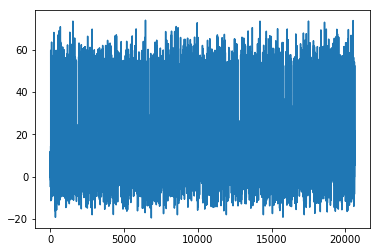

On peut voir que beaucoup de valeur

In [101]:
from sklearn import svm
svr = svm.SVR(kernel='linear')

from sklearn.model_selection import  cross_val_score
cross_val_score(svr, X_train, Y_train, n_jobs=-1)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:93: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.



array([0.46126422, 0.45925879, 0.45746273])

In [103]:
from sklearn.model_selection import GridSearchCV
parameters = {  'gamma' : [0.01, 0.1, 0.5]           }
grid       = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:93: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.



0.6119051374741237 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [164]:
!pip install xgboost
!brew install libomp

Defaulting to user installation because normal site-packages is not writeable


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
'brew' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [165]:
from xgboost import XGBRegressor
algo = XGBRegressor()

In [167]:
default_hyperparameters = algo.get_params()
espace_de_Recherche = {}
for i, hyperparam in enumerate(default_hyperparameters):
    default_value = default_hyperparameters[hyperparam]
    if default_value:
        if type(default_value) == int:
            delta = default_value * 2
            valeurs_de_recherches = [default_value-delta,default_value, default_value+ delta]
        if type(default_value) == float:
            delta = default_value * 0.1
            valeurs_de_recherches = [default_value-delta,default_value, default_value+ delta]
        if type(default_value) == bool:
            valeurs_de_recherches = [True, False]
        espace_de_Recherche[hyperparam]=valeurs_de_recherches
        print(hyperparam, default_value, valeurs_de_recherches)
espace_de_Recherche["n_jobs"]=[-1]

NameError: name 'valeurs_de_recherches' is not defined

In [170]:
def test_hyperparametres(algo, hyperparametres):
    grid       = GridSearchCV(algo, hyperparametres, n_jobs=-1)
    grid.fit(X_train, Y_train)
    print (grid.best_score_, grid.best_estimator_)    
    return grid.best_score_, grid.best_estimator_

In [187]:
espace_de_Recherche = {
    "max_depth" : [1,5,10],
    "gamma" : [0.5, 1, 1.1, 1.2, 1.5]
}
test_hyperparametres(XGBRegressor(), espace_de_Recherche)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:93: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.



0.8674277792019689 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=16, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)


(0.8674277792019689,
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
        importance_type='gain', interaction_constraints='',
        learning_rate=0.300000012, max_delta_step=0, max_depth=5,
        min_child_weight=1, missing=nan, monotone_constraints='()',
        n_estimators=100, n_jobs=16, num_parallel_tree=1,
        objective='reg:squarederror', random_state=0, reg_alpha=0,
        reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
        validate_parameters=1, verbosity=None))

In [184]:
modele = algo.fit(X_train, Y_train)

modele.score(X_test, Y_test)

0.8797434115964579

In [185]:
Y_pred = modele.predict(X_test)
Y_pred

array([ 0.8508553,  0.9387582, 13.065745 , ..., 40.029476 , 13.260258 ,
        4.883303 ], dtype=float32)

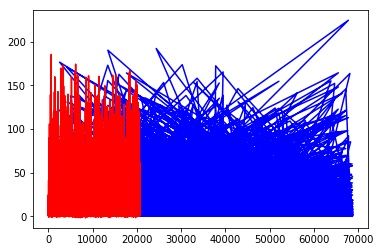

In [186]:
plt.plot(Y_test, color = 'b')
plt.plot(Y_pred, color = 'r')
plt.show()

In [190]:
import pickle
pickle.dump(modele, open('final_prediction.pickle', 'wb'))